# Homework 4: Text Classification

In this homework, you will work with a dataset composed of the posts from Tweetter. The goal is to identify if there is an emergency information in the tweet or not. This is a binary classification task.

\

We will use a dataset from Kaggle contest: https://www.kaggle.com/competitions/nlp-getting-started/data Download train.csv file (test.csv files in competitions typically do not have labels available, only organizers know them and use to validate the submissions). The code below will split the first file into train and validation sets.

*In case you don't want to register on Kaggle or use your gmail account, sent me e-mail and I'll send you the dataset*

In [282]:
import pandas as pd

In [283]:
data = pd.read_csv('train.csv')

In [284]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Q1 (1pt)

Print information about missing values. Fill in missing values with an empty string [Example in SGD notebook](https://github.com/anton-selitskiy/RIT_ML/blob/main/2025_spring/Week04_SGD/ML7.ipynb) in ceaning of the Automobiles dataset.

In [285]:
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [286]:
#fill in missing values with empty string
data = data.fillna('')

In [287]:
print("Missing values in each column after filling:")
print(data.isnull().sum())

Missing values in each column after filling:
id          0
keyword     0
location    0
text        0
target      0
dtype: int64


Now we will split our data into Test, Validation, and Test sets. You don't want to use Test set untill Q10.

In [288]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(data, test_size=0.3, random_state=42)

In [289]:
validation, test = train_test_split(validation, test_size=0.4, random_state=42)

## Q2 (2pt)

1. What is the distribution of the classes in the Training set? (Count the fractions of classes, to understand if they are balanced or not.)

2. Plot the bar-plot for 10 mostly frequent values in the column "keyword".

Comment on the information you've seen.

In [290]:
#print distribution of classes
class_distribution = train['target'].value_counts(normalize=True)
print("Distribution of classes in the Training set:")
print(class_distribution)

Distribution of classes in the Training set:
target
0    0.567461
1    0.432539
Name: proportion, dtype: float64


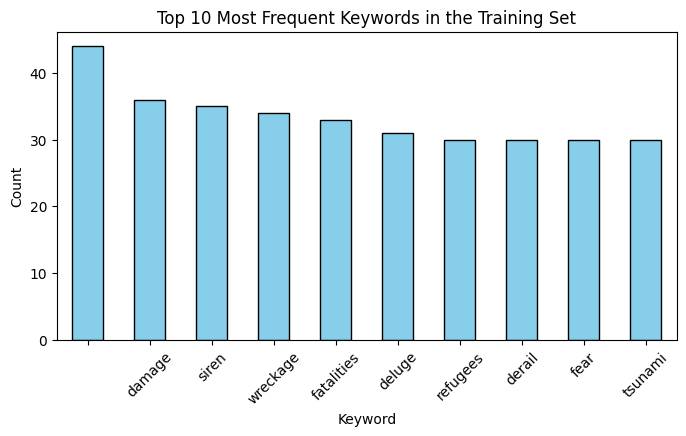

In [291]:
#plot bar-plot for 10 most frequent values in keyword column
import matplotlib.pyplot as plt

top10_keywords = train['keyword'].value_counts().head(10)

plt.figure(figsize=(8,4))
top10_keywords.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Most Frequent Keywords in the Training Set")
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Q3 (1pt)

Join text columns in a new column and delete the column with id.

In [292]:
#join for train set and drop id
train['Concatenated'] = train['keyword'].astype(str) + ' ' + train['location'].astype(str) + ' ' + train['text'].astype(str)
train.drop(columns=['id'], inplace=True)

#join for validation set and drop id
validation['Concatenated'] = validation['keyword'].astype(str) + ' ' + validation['location'].astype(str) + ' ' + validation['text'].astype(str)
validation.drop(columns=['id'], inplace=True)

#join for test set and drop id
test['Concatenated'] = test['keyword'].astype(str) + ' ' + test['location'].astype(str) + ' ' + test['text'].astype(str)
test.drop(columns=['id'], inplace=True)


In [293]:
train[['Concatenated', 'target']].head()

,Concatenated,target
1186,bridge%20collapse Ashes 2015: AustraliaÛªs c...,0
4071,"hail Carol Stream, Illinois GREAT MICHIGAN TEC...",1
5461,police Houston CNN: Tennessee movie theater s...,1
5787,rioting Still rioting in a couple of hours le...,1
7445,wounds Lake Highlands Crack in the path where ...,0


## Q4 (1pt)

Work with train set.

1. Transform the data using CountVectorizer.
2. What is the shape of the resulted matrix?


In [294]:
from sklearn.feature_extraction.text import CountVectorizer

In [295]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train['Concatenated'])

In [296]:
print("Shape of the resulted matrix:", X_train.shape)

Shape of the resulted matrix: (5329, 18455)


## Q5 (2pt)

The matrix in the previous question has many columns. Let's take a look at the dictionary of tokens, method *.vocabulary_* of CountVectorizer object.

1. Find all the words in this dictionary that contain digits. How many such words were found?

2. Find all the words that contain punctuation characters. How many such words were found?

In [297]:
import re

In [298]:
vocab_dict = vectorizer.vocabulary_
vocab_list = list(vocab_dict.keys())

In [299]:
#find words that contain digits
words_with_digits = [word for word in vocab_list if re.search(r'\d', word)]
print("Number of words containing digits:", len(words_with_digits))

Number of words containing digits: 3812


In [300]:
#find words with punctuation
words_with_punctuation = [word for word in vocab_list if re.search(r'[^\w\s]', word)]
print("Number of words containing punctuation:", len(words_with_punctuation))

Number of words containing punctuation: 0


## Q6 (1pt)

During the lecture, we learned that there is a special text tokenizer in NLTK called *TweetTokenizer.* Let's try to apply *CountVectorizer* with this tokenizer. Answer all the questions from the previous section using TweetTokenizer and compare the results.

In [301]:
from nltk.tokenize import TweetTokenizer

In [302]:
#use CountVectorizer with TweetTokenizer
tweet_tokenizer = TweetTokenizer()
vectorizer_tweet = CountVectorizer(tokenizer=tweet_tokenizer.tokenize)
X_train_tweet = vectorizer_tweet.fit_transform(train['Concatenated'])
print("Shape of the resulted matrix with TweetTokenizer:", X_train_tweet.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Shape of the resulted matrix with TweetTokenizer: (5329, 19670)


In [303]:
#vocabulary analysis
vocab_dict_tweet = vectorizer_tweet.vocabulary_
vocab_list_tweet = list(vocab_dict_tweet.keys())

#find words with digits
words_with_digits_tweet = [word for word in vocab_list_tweet if re.search(r'\d', word)]
print("Number of words containing digits with TweetTokenizer:", len(words_with_digits_tweet))

#find words with punctuation
words_with_punctuation_tweet = [word for word in vocab_list_tweet if re.search(r'[^\w\s]', word)]
print("Number of words containing punctuation with TweetTokenizer:", len(words_with_punctuation_tweet))

Number of words containing digits with TweetTokenizer: 3939
Number of words containing punctuation with TweetTokenizer: 7312


## Q7 (4pt)

In scikit-learn, we can evaluate the process of counting matrices using CountVectorizer. CountVectorizer, like other inheritors of the _VectorizerMixin, has arguments tokenizer and preprocessor. The preprocessor is applied at the very beginning to each line of your dataset, while the tokenizer takes a string and returns tokens.

Let's write a custom tokenizer that will do everything we need:

1. Convert all letters to lowercase.
2. Split the text into tokens using *TweetTokenizer* from the *nltk* package.
3. Remove all tokens that contain non-Latin characters, except for emojies (we'll consider tokens containing only punctuation and at least one parenthesis as emoticons) and hashtags that contain only Latin letters after the initial #.
4. Remove all tokens listed in nltk.corpus.stopwords.words('english').
5. Perform stemming using *SnowballStemmer.*

Demonstrate the operation of your function on the first text in the training dataset. You can access it by *.iloc[0]*

Usefull site on regular expressions: https://regex101.com/

In [304]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [305]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [306]:
stemmer = SnowballStemmer('english')

In [307]:
def custom_tokenizer(text):
    # Lowercase transformation
    text = text.lower()

    # Tokenize using TweetTokenizer
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)

    # Filter tokens based on criteria
    valid_tokens = []
    for token in tokens:
        # Keep tokens that contain only Latin characters, "smileys", or valid hashtags

        #check for emojies (must contain only punctuation and atleast one paranthesis)
        if all(ch in string.punctuation for ch in token) and ('(' in token or ')' in token):
            valid_tokens.append(token)
        #check if token is a vlid hashtag followed by latin characters only
        elif token.startswith('#') and re.match(r'^[a-z]+$', token[1:]):
            valid_tokens.append(token)
        #check tokens that consist only of latin letters
        elif token.isalpha():
            valid_tokens.append(token)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in valid_tokens if token not in stop_words]

    # Perform stemming
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    return stemmed_tokens

In [308]:
print("Custom tokens for the first training example:")
print(custom_tokenizer(train.iloc[0]['Concatenated']))

Custom tokens for the first training example:
['bridg', 'ash', 'australia', 'ûªs', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia']


## Q8 (2pt)

1. Apply *CountVectorizer* with your tokenizer to the Train and Validation sets.
2. Train *LogisticRegression* on the features obtained.
3. Calculate f1-score on the validation set.

In [309]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [310]:
#transform training and validation sets using custom tokenizer
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
X_train = vectorizer.fit_transform(train['Concatenated'])
X_validation = vectorizer.transform(validation['Concatenated'])

In [311]:
print("Shape of the training set:", X_train.shape)
print("Shape of the validation set:", X_validation.shape)

Shape of the training set: (5329, 10587)
Shape of the validation set: (1370, 10587)


In [312]:
#train logistic regression on the training features
clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(X_train, train['target'])

LogisticRegression(max_iter=200, random_state=42)

In [313]:
#predict on the validation set
validation_predictions = clf.predict(X_validation)

In [314]:
#calculate f1-score on the validation set
f1 = f1_score(validation['target'], validation_predictions)
print("f1-score on the validation set:", f1)

f1-score on the validation set: 0.743427017225748


## Q9 (2pt)

1. Repeat Q8, but with a TF-IDF vectorizer. How did the quality change?

2. We can further reduce the size of our matrix by discarding *df* values close to one. Most likely, such words do not carry much information about the category since they occur quite frequently. Limit the maximum df in the parameters of TfIdfVectorizer, set the upper limit to 0.9. How did the matrix size change, and how did the quality change?

3. We can also reduce the size of the matrix by removing words with very small *df* values. Were you able to improve the quality by doing this?

For example, min_df = 5 means ignore words that appear less than in 5 documents.

In [315]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [316]:
#using standard TF-IDF vectorizer
vectorizer_tfidf = TfidfVectorizer(tokenizer=custom_tokenizer)
X_train_tfidf = vectorizer_tfidf.fit_transform(train['Concatenated'])
X_validation_tfidf = vectorizer_tfidf.transform(validation['Concatenated'])

print("Standard TF-IDF vectorizer:")
print("Shape of the training set:", X_train_tfidf.shape)
print("Shape of the validation set:", X_validation_tfidf.shape)

clf_tfidf = LogisticRegression(max_iter=200, random_state=42)
clf_tfidf.fit(X_train_tfidf, train['target'])

validation_predictions_tfidf = clf_tfidf.predict(X_validation_tfidf)
f1_tfidf = f1_score(validation['target'], validation_predictions_tfidf)
print("f1-score on the validation set:", f1_tfidf)
print()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Standard TF-IDF vectorizer:
Shape of the training set: (5329, 10587)
Shape of the validation set: (1370, 10587)
f1-score on the validation set: 0.7385192127460168



Using **TF-IDF** resulted in an f1-score of about 0.7385. This is slightly lower compared to the CountVectorizer approach (which had an F1-score of ~0.7434), so the quality is very similar, with a minor drop in performance.

In [317]:
#using TF-IDF with max_df=0.9
vectorizer_tfidf_maxdf = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9)
X_train_tfidf_maxdf = vectorizer_tfidf_maxdf.fit_transform(train['Concatenated'])
X_validation_tfidf_maxdf = vectorizer_tfidf_maxdf.transform(validation['Concatenated'])

print("TF-IDF vectorizer with max_df=0.9:")
print("Shape of the training set:", X_train_tfidf_maxdf.shape)
print("Shape of the validation set:", X_validation_tfidf_maxdf.shape)

clf_tfidf_maxdf = LogisticRegression(max_iter=200, random_state=42)
clf_tfidf_maxdf.fit(X_train_tfidf_maxdf, train['target'])

validation_predictions_tfidf_maxdf = clf_tfidf_maxdf.predict(X_validation_tfidf_maxdf)
f1_tfidf_maxdf = f1_score(validation['target'], validation_predictions_tfidf_maxdf)
print("f1-score on the validation set:", f1_tfidf_maxdf)
print()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF vectorizer with max_df=0.9:
Shape of the training set: (5329, 10587)
Shape of the validation set: (1370, 10587)
f1-score on the validation set: 0.7385192127460168



Setting **max_df=0.9** did not change the matrix size (it remained at 10,587 features) nor did it affect the f1-score (still ~0.7385). This suggests that, in the dataset, discarding words that appear in more than 90% of the documents did not remove many features or influence the model’s quality.



In [318]:
#using TF-IDF with min_df=5
vectorizer_tfidf_mindf = TfidfVectorizer(tokenizer=custom_tokenizer, min_df=5)
X_train_tfidf_mindf = vectorizer_tfidf_mindf.fit_transform(train['Concatenated'])
X_validation_tfidf_mindf = vectorizer_tfidf_mindf.transform(validation['Concatenated'])

print("TF-IDF vectorizer with min_df=5:")
print("Shape of the training set:", X_train_tfidf_mindf.shape)
print("Shape of the validation set:", X_validation_tfidf_mindf.shape)

clf_tfidf_mindf = LogisticRegression(max_iter=200, random_state=42)
clf_tfidf_mindf.fit(X_train_tfidf_mindf, train['target'])

validation_predictions_tfidf_mindf = clf_tfidf_mindf.predict(X_validation_tfidf_mindf)
f1_tfidf_mindf = f1_score(validation['target'], validation_predictions_tfidf_mindf)
print("f1-score on the validation set:", f1_tfidf_mindf)
print()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF vectorizer with min_df=5:
Shape of the training set: (5329, 2038)
Shape of the validation set: (1370, 2038)
f1-score on the validation set: 0.7326549491211841



Applying min_df=5 reduced the number of features dramatically from 10,587 to 2,038, the f1-score dropped very slightly to ~0.7326. Although the quality did not improve, there was a significant reduction in the feature space with almost no loss in performance.

## Q10 (2pt)

Evaluate the best model. The minimal value of f1-score on the Test data should be at least 0.75.

In [319]:
new_train = train.copy()
new_test = test.copy()

#use CountVectorizer with the custom tokenizer
vectorizer_final = CountVectorizer(tokenizer=custom_tokenizer)
X_train_final = vectorizer_final.fit_transform(new_train['Concatenated'])
y_train_final = new_train['target']

X_test_final = vectorizer_final.transform(new_test['Concatenated'])
y_test_final = new_test['target']

print("Shape of training set:", X_train_final.shape)
print("Shape of test set:", X_test_final.shape)

#train the logistic regression model only on train data
clf_final = LogisticRegression(max_iter=200, random_state=42)
clf_final.fit(X_train_final, y_train_final)

#predict on the test set
y_test_pred = clf_final.predict(X_test_final)

#evaluate performance using f1-score
final_f1 = f1_score(y_test_final, y_test_pred)
print("f1-score on the Test data:", final_f1)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Shape of training set: (5329, 10587)
Shape of test set: (914, 10587)
f1-score on the Test data: 0.7651715039577837


## Q11 (2pt)
Visualize the most important features (use class notebook).

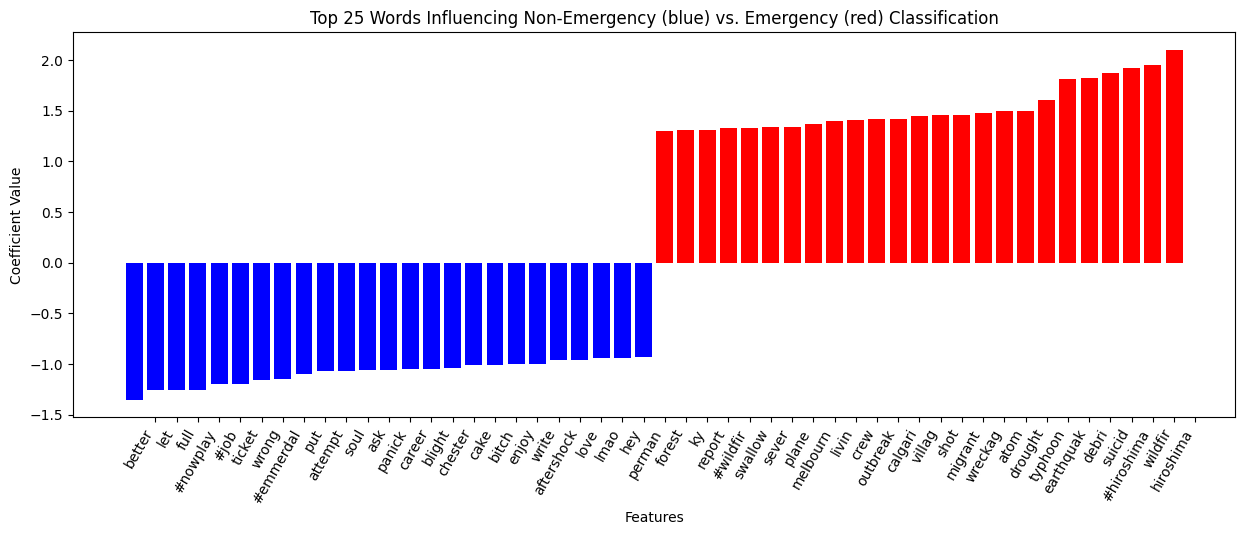

In [320]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_feature_importance(clf, feature_names, n_features=25):
    #extract coefficients and flatten since we have a binary classification model
    coef = clf.coef_.ravel()

    #get indices of most positive and most negative features
    positive_coef = np.argsort(coef)[-n_features:]  #highest weights (strongest positive words)
    negative_coef = np.argsort(coef)[:n_features]   #lowest weights (strongest negative words)
    all_coefs = np.hstack([negative_coef, positive_coef])

    #set up the plot
    plt.figure(figsize=(15, 5))
    colors = ['blue' if c < 0 else 'red' for c in coef[all_coefs]]
    plt.bar(np.arange(2 * n_features), coef[all_coefs], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * n_features), feature_names[all_coefs], rotation=60, ha='right')
    plt.xlabel("Features")
    plt.ylabel("Coefficient Value")
    plt.title("Top 25 Words Influencing Non-Emergency (blue) vs. Emergency (red) Classification")


    #show the plot
    plt.show()

visualize_feature_importance(clf_final, vectorizer_final.get_feature_names_out())
